In [1306]:
!pip install -r requirements.txt

In [1307]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
sns.set(palette="rainbow")
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [1308]:
#Dataset import
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [1309]:
#Show Preview Dataset
train

,Exited,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,681,15780804,Nucci,482,France,Male,55,5,97318.25,1,0,1,78416.14
1,0,8938,15737404,Kesteven,731,France,Male,31,1,132512.26,1,1,1,185466.85
2,0,1468,15681843,Barbour,624,Germany,Female,35,0,180303.24,2,1,0,163587.90
3,0,840,15727915,Artemiev,507,France,Male,36,4,83543.37,1,0,0,140134.43
4,0,6048,15790247,Sims,536,Spain,Male,40,9,0.00,2,1,1,11959.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,0,3000,15593014,Evseyev,525,France,Male,33,1,112833.35,1,0,1,175178.56
6396,0,6667,15798709,Gill,588,Spain,Male,32,3,109109.33,1,0,1,4993.94
6397,1,2093,15757408,Lo,655,Spain,Male,38,3,250898.09,3,0,1,81054.00
6398,1,9694,15728963,Wei,617,Germany,Female,51,10,167273.71,1,0,0,93439.75


In [1310]:
#Show Preview Dataset
test

,Exited,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,6796,15713347,Reynolds,577,Spain,Male,48,6,179852.26,1,1,0,193580.32
1,0,9255,15601116,P'an,686,France,Male,32,6,0.00,2,1,1,179093.26
2,0,5074,15800295,Cruz,644,Germany,Male,34,9,112746.54,2,0,0,141230.07
3,0,5295,15734058,Anayochukwu,509,Germany,Male,32,9,170661.47,1,1,1,21646.20
4,0,6823,15605264,Walker,669,Germany,Male,47,0,63723.78,2,1,1,181928.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0,5894,15641004,Doyne,605,Spain,Female,48,10,150315.92,1,0,1,133486.36
1596,0,695,15681068,Chinagorom,796,France,Female,45,2,109730.22,1,1,1,123882.73
1597,0,9003,15610727,Ch'in,605,France,Male,36,7,128829.25,1,1,0,190588.59
1598,0,164,15680772,Hu,721,Spain,Female,36,2,0.00,2,1,1,106977.80


In [1311]:
#Drop Feature (Elimino queste 3 feature poichè esistono solo per identificare l'utente quindi non sono utili per l'analisi)
train=train.drop(axis=1, columns='RowNumber')
train=train.drop(axis=1, columns='CustomerId')
train=train.drop(axis=1, columns='Surname')
#test
test=test.drop(axis=1, columns='RowNumber')
test=test.drop(axis=1, columns='CustomerId')
test=test.drop(axis=1, columns='Surname')

In [1312]:
#Counting Missing Values(train)
missing_values_count = train.isnull().sum()
missing_values_count

Exited             0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [1313]:
#Counting Missing Values(test)
missing_values_count = test.isnull().sum()
missing_values_count

Exited             0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [1314]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Exited           6400 non-null   int64  
 1   CreditScore      6400 non-null   int64  
 2   Geography        6400 non-null   object 
 3   Gender           6400 non-null   object 
 4   Age              6400 non-null   int64  
 5   Tenure           6400 non-null   int64  
 6   Balance          6400 non-null   float64
 7   NumOfProducts    6400 non-null   int64  
 8   HasCrCard        6400 non-null   int64  
 9   IsActiveMember   6400 non-null   int64  
 10  EstimatedSalary  6400 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 550.1+ KB


In [1315]:
#See Details of Datatset
train.describe()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,0.204375,651.577344,38.829531,4.997187,75891.214042,1.533594,0.703906,0.515781,99979.975328
std,0.403276,96.961277,10.544683,2.869892,62389.353698,0.581366,0.456569,0.499790,57277.172161
min,0.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000
25%,0.000000,585.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51315.622500
50%,0.000000,653.000000,37.000000,5.000000,96120.470000,1.000000,1.000000,1.000000,99691.065000
75%,0.000000,720.000000,44.000000,7.000000,127300.880000,2.000000,1.000000,1.000000,148609.172500
max,1.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199909.320000


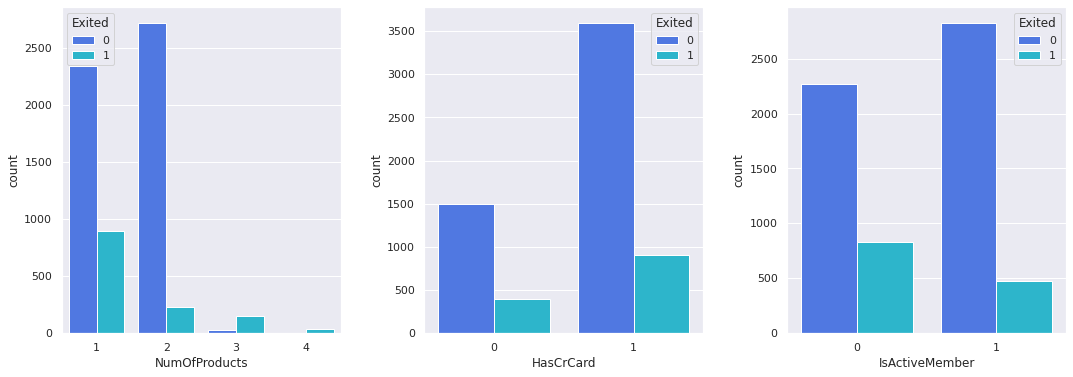

In [1316]:
#Data Visualization
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = train, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = train, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = train, ax = ax[2])
plt.show()

In [1317]:
#Da questi grafici notiamo che i clienti con 3-4 Prodotti hanno percentuali molto alte di uscire, 
#Notiamo anche che i membri che non sono attivi hanno più probabilità di uscire rispetto agli altri, 
#Mentre per quanto riguarda i possessori di carte di credito non notiamo particolari corrispondenze

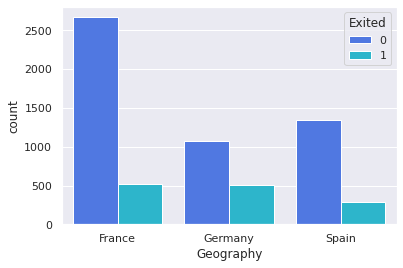

In [1318]:
#Data Visualization
sns.countplot(x='Geography', hue = 'Exited',data = train)
plt.show()

In [1319]:
#Da questo grafico notiamo la Germania ha percentuali più alte di Exited

In [1320]:
# Percentage per category for the target column.
percentage_labels = train['Exited'].value_counts(normalize = True) * 100
percentage_labels

0    79.5625
1    20.4375
Name: Exited, dtype: float64

In [1321]:
#Da questa percentuale notiamo quindi che abbiamo molte meno informazioni sui clienti Exited quindi essendoci meno informazioni sui clienti che escono 
#sarà più facile commettere errori nella previsione di questi ultimi 

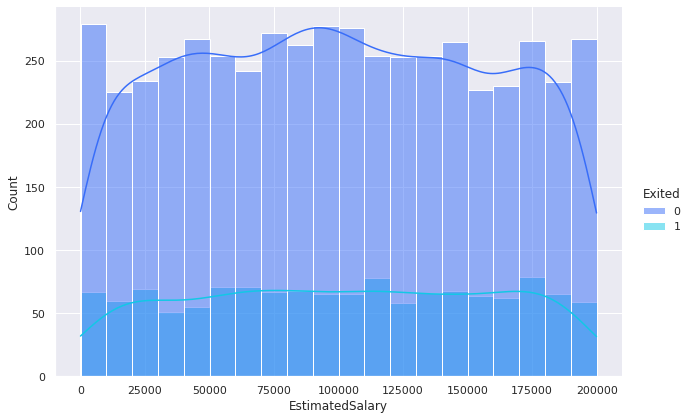

In [1322]:
#Visualizzazione distribuzione EstimatedSalary
sns.displot(data=train, x="EstimatedSalary", hue="Exited",  height=6, aspect=1.5, kde = True)
plt.show()

In [1323]:
#Divide Salary in band(Dato che i valori oscillano molto decido di dividere i Salari stimati in 10 fasce)
train['EstimatedSalaryBand'] = pd.cut(train['EstimatedSalary'], 10)
train[['EstimatedSalaryBand', 'Exited']].groupby(['EstimatedSalaryBand'], as_index=False).mean().sort_values(by='EstimatedSalaryBand', ascending=True)

,EstimatedSalaryBand,Exited
0,"(-109.749, 20071.995]",0.201268
1,"(20071.995, 40053.92]",0.197694
2,"(40053.92, 60035.845]",0.194745
3,"(60035.845, 80017.77]",0.211656
4,"(80017.77, 99999.695]",0.197329
5,"(99999.695, 119981.62]",0.212481
6,"(119981.62, 139963.545]",0.196513
7,"(139963.545, 159945.47]",0.211538
8,"(159945.47, 179927.395]",0.221350
9,"(179927.395, 199909.32]",0.198718


In [1324]:
train.loc[train['EstimatedSalary'] <= 20071.995, 'EstimatedSalary'] = 0
train.loc[(train['EstimatedSalary'] > 20071.995) & (train['EstimatedSalary'] <= 40053.92), 'EstimatedSalary'] = 1
train.loc[(train['EstimatedSalary'] > 40053.92) & (train['EstimatedSalary'] <= 60035.845), 'EstimatedSalary'] = 2
train.loc[(train['EstimatedSalary'] > 60035.845) & (train['EstimatedSalary'] <= 80017.77), 'EstimatedSalary'] = 3
train.loc[(train['EstimatedSalary'] > 80017.77) & (train['EstimatedSalary'] <= 99999.695), 'EstimatedSalary'] = 4
train.loc[(train['EstimatedSalary'] > 99999.695) & (train['EstimatedSalary'] <= 119981.62), 'EstimatedSalary'] = 5
train.loc[(train['EstimatedSalary'] > 119981.62) & (train['EstimatedSalary'] <= 139963.545), 'EstimatedSalary'] = 6
train.loc[(train['EstimatedSalary'] > 139963.545) & (train['EstimatedSalary'] <= 159945.47), 'EstimatedSalary'] = 7
train.loc[(train['EstimatedSalary'] > 159945.47) & (train['EstimatedSalary'] <= 179927.395), 'EstimatedSalary'] = 8
train.loc[(train['EstimatedSalary'] > 179927.395) & (train['EstimatedSalary'] <= 199909.32), 'EstimatedSalary'] = 9


test.loc[test['EstimatedSalary'] <= 20071.995, 'EstimatedSalary'] = 0
test.loc[(test['EstimatedSalary'] > 20071.995) & (test['EstimatedSalary'] <= 40053.92), 'EstimatedSalary'] = 1
test.loc[(test['EstimatedSalary'] > 40053.92) & (test['EstimatedSalary'] <= 60035.845), 'EstimatedSalary'] = 2
test.loc[(test['EstimatedSalary'] > 60035.845) & (test['EstimatedSalary'] <= 80017.77), 'EstimatedSalary'] = 3
test.loc[(test['EstimatedSalary'] > 80017.77) & (test['EstimatedSalary'] <= 99999.695), 'EstimatedSalary'] = 4
test.loc[(test['EstimatedSalary'] > 99999.695) & (test['EstimatedSalary'] <= 119981.62), 'EstimatedSalary'] = 5
test.loc[(test['EstimatedSalary'] > 119981.62) & (test['EstimatedSalary'] <= 139963.545), 'EstimatedSalary'] = 6
test.loc[(test['EstimatedSalary'] > 139963.545) & (test['EstimatedSalary'] <= 159945.47), 'EstimatedSalary'] = 7
test.loc[(test['EstimatedSalary'] > 159945.47) & (test['EstimatedSalary'] <= 179927.395), 'EstimatedSalary'] = 8
test.loc[(test['EstimatedSalary'] > 179927.395) & (test['EstimatedSalary'] <= 199909.32), 'EstimatedSalary'] = 9

train = train = train.drop("EstimatedSalaryBand", axis = 1)
#verifichiamo
train.EstimatedSalary.unique()

array([3., 9., 8., 7., 0., 5., 4., 6., 2., 1.])

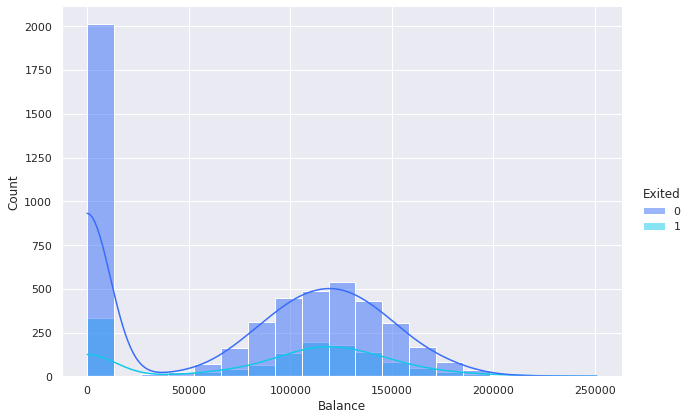

In [1325]:
sns.displot(data=train, x="Balance", hue="Exited",  height=6, aspect=1.5, kde = True)
plt.show()

In [1326]:
#Divide Salary in band
train['BalanceBand'] = pd.cut(train['Balance'], 10)
train[['BalanceBand', 'Exited']].groupby(['BalanceBand'], as_index=False).mean().sort_values(by='BalanceBand', ascending=True)

,BalanceBand,Exited
0,"(-250.898, 25089.809]",0.141638
1,"(25089.809, 50179.618]",0.250000
2,"(50179.618, 75269.427]",0.243478
3,"(75269.427, 100359.236]",0.199224
4,"(100359.236, 125449.045]",0.260837
5,"(125449.045, 150538.854]",0.247048
6,"(150538.854, 175628.663]",0.214751
7,"(175628.663, 200718.472]",0.247863
8,"(200718.472, 225808.281]",0.647059
9,"(225808.281, 250898.09]",1.000000


In [1327]:
train.loc[train['Balance'] <= 25089.809, 'Balance'] = 0
train.loc[(train['Balance'] > 25089.809) & (train['Balance'] <= 50179.618), 'Balance'] = 1
train.loc[(train['Balance'] > 50179.618) & (train['Balance'] <=  75269.427), 'Balance'] = 2
train.loc[(train['Balance'] > 75269.427) & (train['Balance'] <= 100359.236), 'Balance'] = 3
train.loc[(train['Balance'] > 100359.236) & (train['Balance'] <= 125449.045), 'Balance'] = 4
train.loc[(train['Balance'] > 125449.045) & (train['Balance'] <= 150538.854), 'Balance'] = 5
train.loc[(train['Balance'] > 150538.854) & (train['Balance'] <= 175628.663), 'Balance'] = 6
train.loc[(train['Balance'] > 175628.663) & (train['Balance'] <= 200718.472), 'Balance'] = 7
train.loc[(train['Balance'] > 200718.472) & (train['Balance'] <= 225808.281), 'Balance'] = 8
train.loc[(train['Balance'] > 225808.281) & (train['Balance'] <= 250898.09), 'Balance'] = 9


test.loc[test['Balance'] <= 25089.809, 'Balance'] = 0
test.loc[(test['Balance'] > 25089.809) & (test['Balance'] <= 50179.618), 'Balance'] = 1
test.loc[(test['Balance'] > 50179.618) & (test['Balance'] <=  75269.427), 'Balance'] = 2
test.loc[(test['Balance'] > 75269.427) & (test['Balance'] <= 100359.236), 'Balance'] = 3
test.loc[(test['Balance'] > 100359.236) & (test['Balance'] <= 125449.045), 'Balance'] = 4
test.loc[(test['Balance'] > 125449.045) & (test['Balance'] <= 150538.854), 'Balance'] = 5
test.loc[(test['Balance'] > 150538.854) & (test['Balance'] <= 175628.663), 'Balance'] = 6
test.loc[(test['Balance'] > 175628.663) & (test['Balance'] <= 200718.472), 'Balance'] = 7
test.loc[(test['Balance'] > 200718.472) & (test['Balance'] <= 225808.281), 'Balance'] = 8
test.loc[(test['Balance'] > 225808.281) & (test['Balance'] <= 250898.09), 'Balance'] = 9

train = train = train.drop("BalanceBand", axis = 1)
#verifichiamo
train.Balance.unique()

array([3., 5., 7., 0., 2., 4., 6., 1., 8., 9.])

In [1328]:
#Encoding
le = preprocessing.LabelEncoder()
for l in train:
  if ((l=='Geography')|(l=='Gender')):
    train[l]=le.fit_transform(train[l].astype(str))
    test[l]=le.fit_transform(test[l].astype(str))


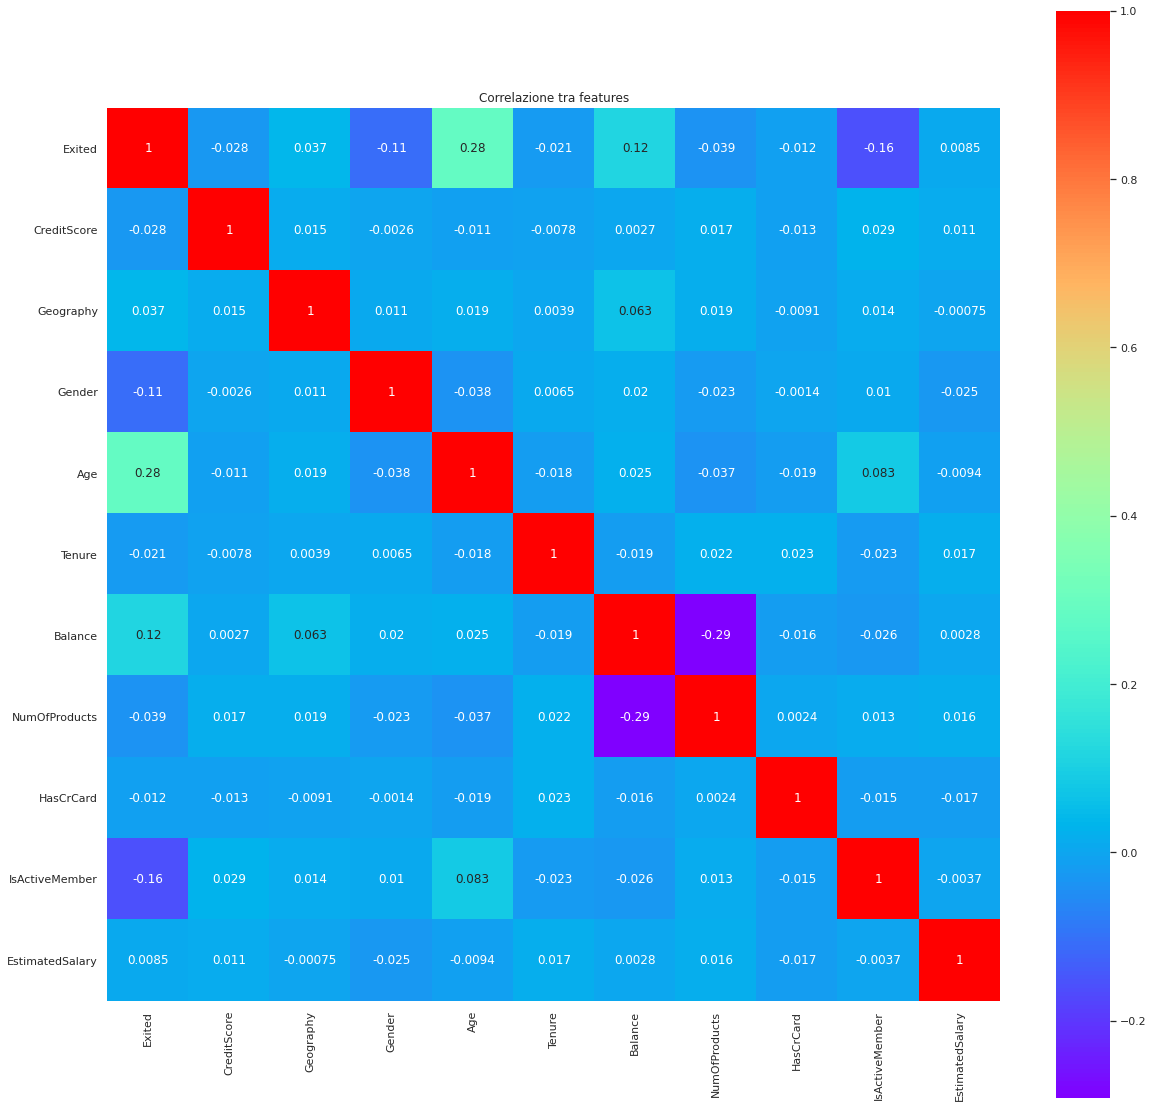

In [1329]:
#Correlation Graphic
correlation = train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=1,  cmap='rainbow', square=True,annot=True)
plt.title('Correlazione tra features')
plt.show()

In [1330]:
#Dal grafico della correlazione possiamo notare che ci sono molte features con bassissima correlazione con Exited, tra cui Estimated Salary(nonostante il raggruppamento) e HasCrCard
#ma nonostante questo dopo varie prove dato l'utilizzo del Random Forest Classifier i valori di accuracy risultavano più alti nel caso in cui venivano lasciate, rispetto a dropparle
#quindi decido di lasciarle, inoltre qui notiamo come l'età sia il valore che ha una maggiore correlazione con Exited

In [1331]:
#Divide
trainY=train['Exited']
testY=test['Exited']
trainX=train.drop('Exited', axis=1)
testX=test.drop('Exited', axis=1)

In [1332]:
#Model training and score(Modello non spiegato a lezione, è un classificatore d'insieme che si ottiene dall'aggregazione di alberi di decisione infatti come si può notare ha una precisione più alta rispetto al semplice Decision Tree)
forest = RandomForestClassifier()
forest.fit(trainX, trainY)
prediction = forest.predict(testX)
print('Accuracy:',(accuracy_score(testY, prediction)* 100), "%")

Accuracy: 86.25 %


Text(0.5, 12.5, 'Predicted label')

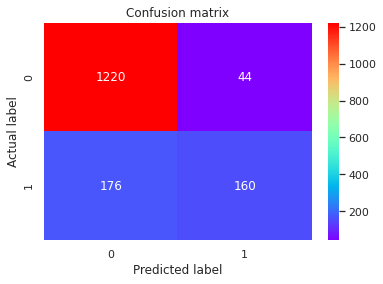

In [1333]:
#Confusion Matrix(Grafico utile per notare dove sono stati compiuti più errori da parte del modello)
predY = forest.predict(testX)

cnf_matrix = metrics.confusion_matrix(testY, predY)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="rainbow" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [1334]:
#Come ho annunciato in precedentemente abbiamo che principalmente gli errori sono stati compiuti per indovinare i clienti 'Exited' poichp i dati sono molto pochi su di essi 